In [6]:
# load thư viện cần dùng
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist 
from tensorflow.keras.layers import   Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Normalization,LeakyReLU
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import cv2 as cv
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
from keras.models import load_model

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
def load_data():
    file = open('/content/drive/MyDrive/Data/food (1).data','rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(5500, 224, 224, 3)
(5500, 10)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(4400, 224, 224, 3)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0008), metrics=['accuracy'])

In [12]:
avg = ImageDataGenerator(rotation_range=25,
                    width_shift_range=0.5,
                    height_shift_range=0.5,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [13]:
history = model.fit_generator(avg.flow(X_train, y_train, batch_size=64), epochs=80, validation_data=avg.flow(X_test,y_test, batch_size=64))

<ipython-input-13-e5a89d06acd5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(avg.flow(X_train, y_train, batch_size=64), epochs=80, validation_data=avg.flow(X_test,y_test, batch_size=64))


Epoch 1/80
69/69 [==============================] - 94s 1s/step - loss: 91.1148 - accuracy: 0.1118 - val_loss: 2.2877 - val_accuracy: 0.1391
Epoch 2/80
69/69 [==============================] - 70s 1s/step - loss: 2.2368 - accuracy: 0.1500 - val_loss: 2.2025 - val_accuracy: 0.1555
Epoch 3/80
69/69 [==============================] - 73s 1s/step - loss: 2.1884 - accuracy: 0.1736 - val_loss: 2.2411 - val_accuracy: 0.1382
Epoch 4/80
69/69 [==============================] - 73s 1s/step - loss: 2.1567 - accuracy: 0.1948 - val_loss: 2.1187 - val_accuracy: 0.1882
Epoch 5/80
69/69 [==============================] - 71s 1s/step - loss: 2.1284 - accuracy: 0.2107 - val_loss: 2.1070 - val_accuracy: 0.1991
Epoch 6/80
69/69 [==============================] - 70s 1s/step - loss: 2.1185 - accuracy: 0.2102 - val_loss: 2.0986 - val_accuracy: 0.2282
Epoch 7/80
69/69 [==============================] - 68s 986ms/step - loss: 2.0993 - accuracy: 0.2075 - val_loss: 2.1019 - val_accuracy: 0.2218
Epoch 8/80
69/69

In [14]:
model.save('/content/drive/MyDrive/Data/AI_Food.h5')

In [15]:
Food = load_model('/content/drive/MyDrive/Data/AI_Food.h5')

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Loss: ', test_loss)
print('Accuracy: ', test_acc)

35/35 [==============================] - 3s 28ms/step - loss: 1.0072 - accuracy: 0.6927
Loss:  1.0071604251861572
Accuracy:  0.692727267742157


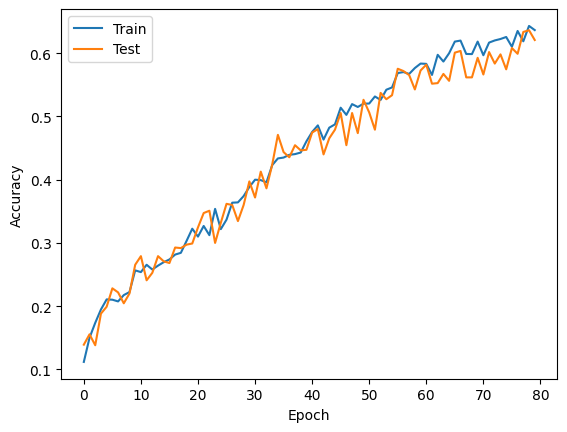

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 54ms/step
[[6.7379960e-06 9.0915542e-08 5.2713895e-05 8.7872630e-01 1.8158710e-06
  3.0533206e-02 6.4624055e-07 1.4709839e-07 5.6319900e-02 3.4358490e-02]]
This picture is:  Bun bo hue [6.7379960e-06 9.0915542e-08 5.2713895e-05 8.7872630e-01 1.8158710e-06
 3.0533206e-02 6.4624055e-07 1.4709839e-07 5.6319900e-02 3.4358490e-02]
0.8787263


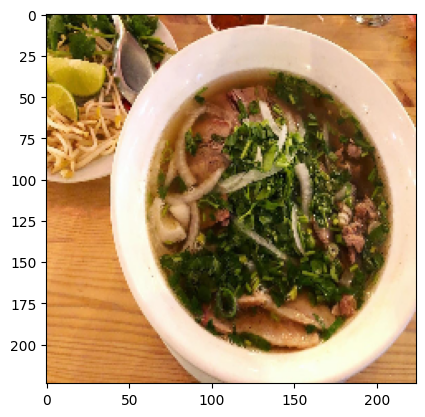

In [23]:
Food1 = ['Banh cuon','Banh mi','Banh xeo','Bun bo hue','Bun dau mam tom','Chao long','Com tam','Goi cuon','mi quang','pho']
img = X_test[61]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", Food1[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

image = X[61]
Food2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(Food2)
plt.show()